In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/star_classification.csv",index_col=0)

In [ ]:
df

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
obj_ID,,,,,,,,,,,,,,,,,
1.240000e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606.0,301.0,2.0,79.0,6.540000e+18,GALAXY,0.634794,5812.0,56354.0,171.0
1.240000e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518.0,301.0,5.0,119.0,1.180000e+19,GALAXY,0.779136,10445.0,58158.0,427.0
1.240000e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606.0,301.0,2.0,120.0,5.150000e+18,GALAXY,0.644195,4576.0,55592.0,299.0
1.240000e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192.0,301.0,3.0,214.0,1.030000e+19,GALAXY,0.932346,9149.0,58039.0,775.0
1.240000e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102.0,301.0,3.0,137.0,6.890000e+18,GALAXY,0.116123,6121.0,56187.0,842.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.240000e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778.0,301.0,2.0,581.0,1.060000e+19,GALAXY,0.000000,9374.0,57749.0,438.0
1.240000e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917.0,301.0,1.0,289.0,8.590000e+18,GALAXY,0.404895,7626.0,56934.0,866.0
1.240000e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314.0,301.0,4.0,308.0,3.110000e+18,GALAXY,0.143366,2764.0,54535.0,74.0


Handle missing value

In [ ]:
df.isnull().sum()

alpha             0
delta           759
u               256
g              3168
r              1626
i              2571
z               157
run_ID          561
rerun_ID          5
cam_col           6
field_ID          4
spec_obj_ID       7
class             0
redshift         32
plate          3025
MJD            3987
fiber_ID         10
dtype: int64

In [ ]:
df['alpha' ].fillna(df['alpha'].median(), inplace=True)
df['delta' ].fillna(df['delta'].median(), inplace=True)
df['u' ].fillna(df['u'].median(), inplace=True)
df['g' ].fillna(df['g'].median(), inplace=True)
df['r' ].fillna(df['r'].median(), inplace=True)
df['i' ].fillna(df['i'].median(), inplace=True)
df['z' ].fillna(df['z'].median(), inplace=True)
df['run_ID' ].fillna(df['run_ID'].median(), inplace=True)
df['rerun_ID' ].fillna(df['rerun_ID'].median(), inplace=True)
df['cam_col' ].fillna(df['cam_col'].median(), inplace=True)
df['field_ID' ].fillna(df['field_ID'].median(), inplace=True)
df['spec_obj_ID' ].fillna(df['spec_obj_ID'].median(), inplace=True)
df['redshift' ].fillna(df['redshift'].median(), inplace=True)
df['plate' ].fillna(df['plate'].median(), inplace=True)
df['MJD' ].fillna(df['MJD'].median(), inplace=True)
df['fiber_ID' ].fillna(df['fiber_ID'].median(), inplace=True)

In [ ]:
df.isnull().sum()

alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Outlier

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


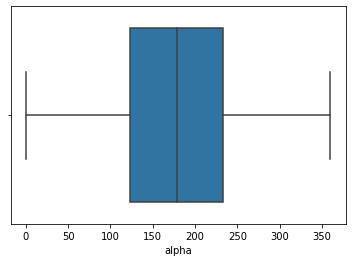

In [ ]:
sns.boxplot(df['alpha'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


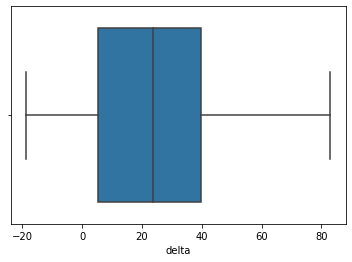

In [ ]:
sns.boxplot(df['delta'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


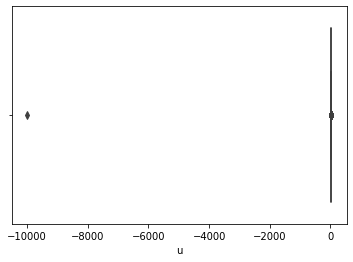

In [ ]:
sns.boxplot(df['u'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


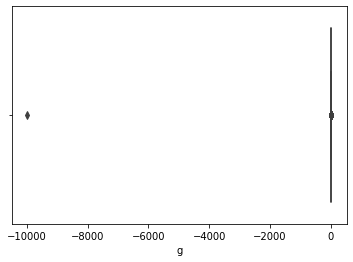

In [ ]:
sns.boxplot(df['g'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


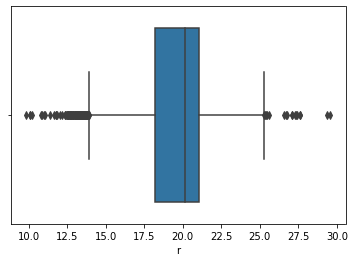

In [ ]:
sns.boxplot(df['r'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


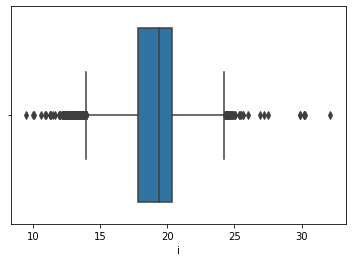

In [ ]:
sns.boxplot(df['i'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


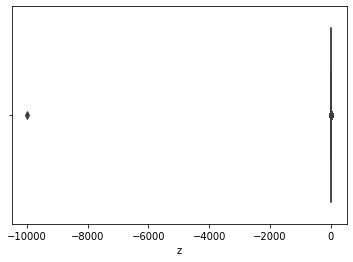

In [ ]:
sns.boxplot(df['z'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


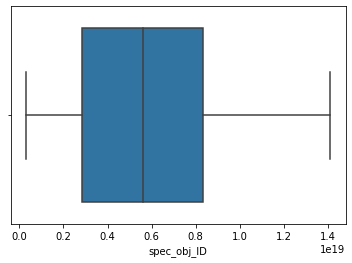

In [ ]:
sns.boxplot(df['spec_obj_ID'])

Normalizer

In [ ]:
from scipy.stats import zscore

# Calculate the zscores and drop zscores into new column -- New value = (x – μ) / σ  (orginal - avg / sd)
df['u'] = zscore(df['u'])
df['g'] = zscore(df['g'])
df['r'] = zscore(df['r'])
df['i'] = zscore(df['i'])
df['z'] = zscore(df['z'])
df['spec_obj_ID'] = zscore(df['spec_obj_ID'])
display(df)

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
obj_ID,,,,,,,,,,,,,,,,,
1.240000e+18,135.689107,32.494632,0.003927,0.054524,0.402954,0.041523,18.79371,3606.0,301.0,2.0,79.0,0.227424,GALAXY,0.634794,5812.0,56354.0,171.0
1.240000e+18,144.826101,31.274185,0.092825,0.072055,1.591909,1.194609,21.61427,4518.0,301.0,5.0,119.0,1.809951,GALAXY,0.779136,10445.0,58158.0,427.0
1.240000e+18,142.188790,35.582444,0.008798,0.066764,0.519573,0.146812,18.94827,3606.0,301.0,2.0,120.0,-0.190772,GALAXY,0.644195,4576.0,55592.0,299.0
1.240000e+18,338.741038,-0.402828,0.018311,0.101811,1.063626,0.812484,19.25010,4192.0,301.0,3.0,214.0,1.358660,GALAXY,0.932346,9149.0,58039.0,775.0
1.240000e+18,345.282593,21.183866,-0.098479,-0.093359,-1.713578,-1.794660,15.54461,8102.0,301.0,3.0,137.0,0.332726,GALAXY,0.116123,6121.0,56187.0,842.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.240000e+18,39.620709,-2.594074,0.065134,0.076590,1.222423,1.273709,20.73569,7778.0,301.0,2.0,581.0,1.448918,GALAXY,0.000000,9374.0,57749.0,438.0
1.240000e+18,29.493819,19.798874,0.023517,0.058020,0.432832,0.382349,19.41526,7917.0,301.0,1.0,289.0,0.844189,GALAXY,0.404895,7626.0,56934.0,866.0
1.240000e+18,224.587407,15.700707,-0.041507,-0.040137,-0.786707,-0.808088,17.35221,5314.0,301.0,4.0,308.0,-0.804527,GALAXY,0.143366,2764.0,54535.0,74.0


In [ ]:
x = df.drop(columns=['class', 'run_ID', 'cam_col', 'field_ID', 'plate', 'MJD'])

x

In [ ]:
y = df['class']
y

obj_ID
1.240000e+18    GALAXY
1.240000e+18    GALAXY
1.240000e+18    GALAXY
1.240000e+18    GALAXY
1.240000e+18    GALAXY
                 ...  
1.240000e+18    GALAXY
1.240000e+18    GALAXY
1.240000e+18    GALAXY
1.240000e+18    GALAXY
1.240000e+18    GALAXY
Name: class, Length: 100000, dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


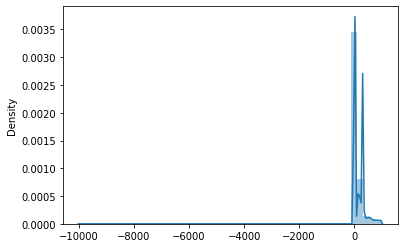

In [ ]:
sns.distplot(x)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
train = scaler.fit_transform(x)

In [ ]:
train

array([[-3.76242695e-01,  4.28054142e-01,  3.92657210e-03, ...,
         2.27424426e-01,  7.95399032e-02, -1.02136411e+00],
       [-2.84489020e-01,  3.65698416e-01,  9.28250084e-02, ...,
         1.80995107e+00,  2.77095153e-01, -8.18770326e-02],
       [-3.10972892e-01,  5.85818297e-01,  8.79799562e-03, ...,
        -1.90771779e-01,  9.24065117e-02, -5.51620570e-01],
       ...,
       [ 5.16473860e-01, -4.29990004e-01, -4.15066383e-02, ...,
        -8.04527362e-01, -5.93056517e-01, -1.37734163e+00],
       [ 3.92768633e-01,  1.15181735e+00, -1.39650450e-03, ...,
         5.46336641e-01, -1.66481685e-01,  7.59274371e-02],
       [ 2.38397336e-01,  1.29509499e+00,  1.92771034e-02, ...,
         7.68973470e-01, -4.61704300e-02,  1.47414844e+00]])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


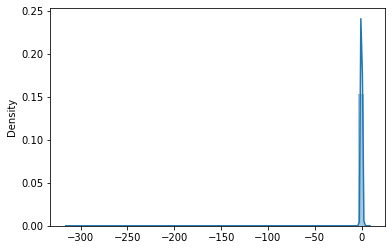

In [ ]:
sns.distplot(train)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train,y, test_size=0.25)

## **Using KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
pred

array(['GALAXY', 'GALAXY', 'STAR', ..., 'QSO', 'GALAXY', 'GALAXY'],
      dtype=object)

In [ ]:
print(confusion_matrix(y_test,pred))

[[14003   381   466]
 [  595  4126    23]
 [  653    25  4728]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      GALAXY       0.92      0.94      0.93     14850
         QSO       0.91      0.87      0.89      4744
        STAR       0.91      0.87      0.89      5406

    accuracy                           0.91     25000
   macro avg       0.91      0.90      0.90     25000
weighted avg       0.91      0.91      0.91     25000



In [ ]:
knn.score(X_test,y_test)

0.91428

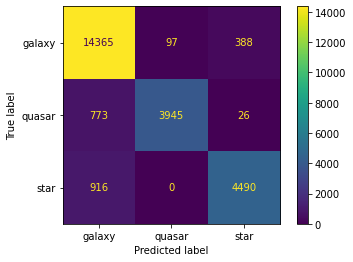

In [ ]:
cm = confusion_matrix(y_test, pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['galaxy', 'quasar', 'star'])
cm_disp.plot()

## **Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
pred = gnb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[12232  2249   369]
 [  515  4227     2]
 [    2   221  5183]]
              precision    recall  f1-score   support

      GALAXY       0.96      0.82      0.89     14850
         QSO       0.63      0.89      0.74      4744
        STAR       0.93      0.96      0.95      5406

    accuracy                           0.87     25000
   macro avg       0.84      0.89      0.86     25000
weighted avg       0.89      0.87      0.87     25000



In [ ]:
gnb.score(X_test,y_test)

0.86568

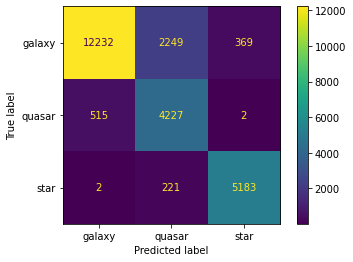

In [ ]:
cm = confusion_matrix(y_test, pred)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['galaxy', 'quasar', 'star'])
cm_disp.plot()

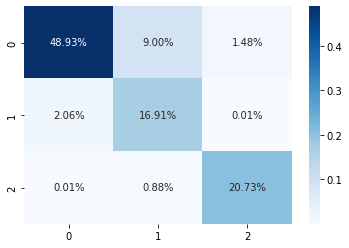

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      GALAXY       0.96      0.97      0.96     14850
         QSO       0.95      0.86      0.90      4744
        STAR       0.95      1.00      0.97      5406

    accuracy                           0.95     25000
   macro avg       0.95      0.94      0.95     25000
weighted avg       0.95      0.95      0.95     25000



In [ ]:
print(confusion_matrix(y_test, predictions))

[[14349   218   283]
 [  642  4100     2]
 [    2     2  5402]]


In [ ]:
logmodel.score(X_test,y_test)

0.95404

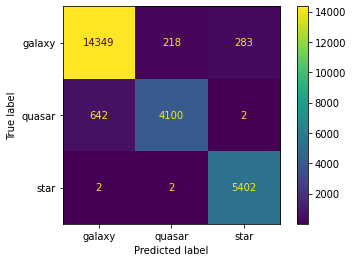

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['galaxy', 'quasar', 'star'])
cm_disp.plot()

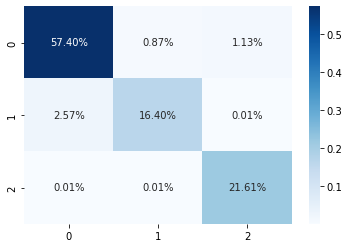

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtc.predict(X_test)

In [ ]:
predictions

array(['GALAXY', 'GALAXY', 'STAR', ..., 'QSO', 'GALAXY', 'GALAXY'],
      dtype=object)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      GALAXY       0.97      0.97      0.97     14850
         QSO       0.91      0.91      0.91      4744
        STAR       1.00      0.99      0.99      5406

    accuracy                           0.96     25000
   macro avg       0.96      0.96      0.96     25000
weighted avg       0.96      0.96      0.96     25000



In [ ]:
print(confusion_matrix(y_test,predictions))

[[14378   454    18]
 [  414  4329     1]
 [   36     0  5370]]


In [ ]:
dtc.score(X_test,y_test)

0.96308

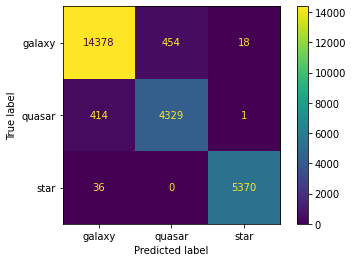

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['galaxy', 'quasar', 'star'])
cm_disp.plot()

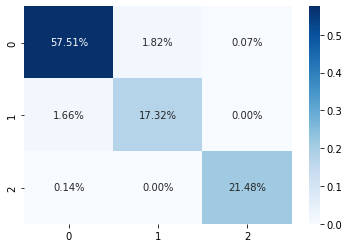

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')